In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randint(0,100,size=(780, 1)), columns=list('r'))

In [ ]:
df.head()

,r
0,44
1,95
2,41
3,0
4,18


In [ ]:
df_1 = pd.DataFrame(np.random.randint(900,1000,size=(20, 1)), columns=list('r'))

In [ ]:
res = pd.concat([df, df_1], ignore_index=True)

In [ ]:
res.columns = ['response_time']

In [ ]:
res

,response_time
0,44
1,95
2,41
3,0
4,18
...,...
795,995
796,964
797,993
798,978


In [ ]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


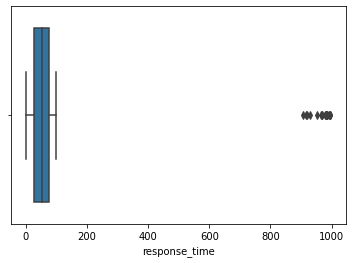

In [ ]:
sns.boxplot(res.response_time)

In [ ]:
random_state = np.random.RandomState(42)

In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.02),random_state=random_state)

model.fit(res[['response_time']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.02, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F2B4F97A7C0, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
res['scores'] = model.decision_function(res[['response_time']])

res['anomaly_score'] = model.predict(res[['response_time']])

res[res['anomaly_score']==-1].head()

,response_time,scores,anomaly_score
780,969,-0.019059,-1
781,906,-0.064189,-1
782,996,-0.016453,-1
784,994,-0.007143,-1
787,994,-0.007143,-1


In [ ]:
res[res['anomaly_score']==-1]

,response_time,scores,anomaly_score
780,969,-0.019059,-1
781,906,-0.064189,-1
782,996,-0.016453,-1
784,994,-0.007143,-1
787,994,-0.007143,-1
788,916,-0.057035,-1
789,931,-0.049945,-1
790,986,-0.000999,-1
791,986,-0.000999,-1
792,952,-0.041303,-1


In [ ]:
accuracy = 100*list(res['anomaly_score']).count(-1)/20
print("Accuracy of the model:", accuracy)

Accuracy of the model: 80.0


In [ ]:
res[res['anomaly_score']==-1]

,response_time,scores,anomaly_score
780,969,-0.019059,-1
781,906,-0.064189,-1
782,996,-0.016453,-1
784,994,-0.007143,-1
787,994,-0.007143,-1
788,916,-0.057035,-1
789,931,-0.049945,-1
790,986,-0.000999,-1
791,986,-0.000999,-1
792,952,-0.041303,-1


In [ ]:
dfr = pd.read_csv('test_cases_produced.csv')

In [ ]:
dfr

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds
0,0,GET,/petclinic,NaN,302,15000
1,1,HEAD,/petclinic,NaN,302,0
2,2,POST,/petclinic,NaN,302,0
3,3,PUT,/petclinic,NaN,302,11000
4,4,DELETE,/petclinic,NaN,302,19000
...,...,...,...,...,...,...
16579,16579,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,22000
16580,16580,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,21000
16581,16581,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,13000
16582,16582,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,14000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


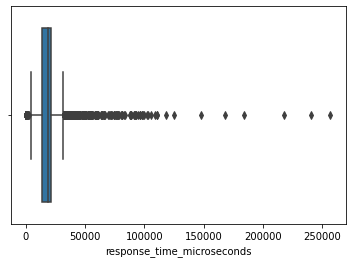

In [ ]:
sns.boxplot(dfr.response_time_microseconds)

In [ ]:
dfr['count'] = dfr.groupby(['response_code'])['response_time_microseconds'].transform('count')

In [ ]:
dfr.head()

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count
0,0,GET,/petclinic,NaN,302,15000,107
1,1,HEAD,/petclinic,NaN,302,0,107
2,2,POST,/petclinic,NaN,302,0,107
3,3,PUT,/petclinic,NaN,302,11000,107
4,4,DELETE,/petclinic,NaN,302,19000,107


In [ ]:
dfr.drop_duplicates('response_code')

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count
0,0,GET,/petclinic,NaN,302,15000,107
7,7,GET,/petclinic/actuator,NaN,200,19000,15121
9,9,GET,/petclinic/actuator/health/**,"{ ""fuzz"": false }",404,13000,275
12,12,POST,/petclinic/api/owners,"{ ""fuzz"": false }",400,17000,483
24,24,POST,/petclinic/api/pettypes,"{ ""id"":1, ""name"":""fuzzstring""}",201,23000,376
296,296,GET,/petclinic/error,"{ ""date"":""fuzzstring"", ""description"":""fu...",500,17000,96
369,369,PUT,/petclinic/api/specialties/1,"{ ""id"":1, ""name"":""fuzzstring""}",204,12000,126


In [ ]:
df_200 = dfr.loc[dfr['response_code']==200]

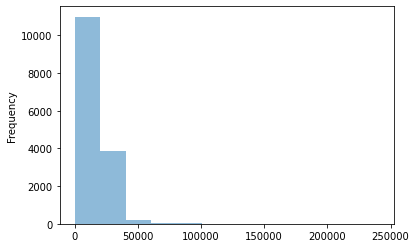

In [ ]:
ax = df_200['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

In [ ]:
df_201 = dfr.loc[dfr['response_code']==201]
df_204 = dfr.loc[dfr['response_code']==204]
df_302 = dfr.loc[dfr['response_code']==302]
df_400 = dfr.loc[dfr['response_code']==400]
df_404 = dfr.loc[dfr['response_code']==404]
df_500 = dfr.loc[dfr['response_code']==500]

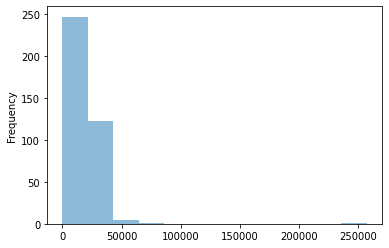

In [ ]:
ax = df_201['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

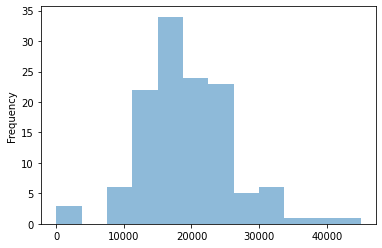

In [ ]:
ax = df_204['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

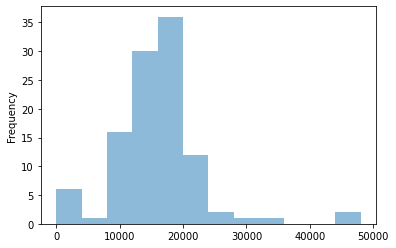

In [ ]:
ax = df_302['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

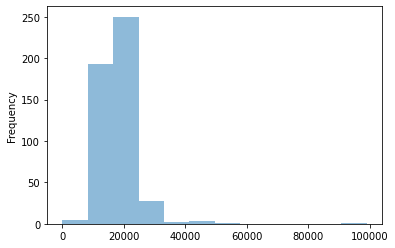

In [ ]:
ax = df_400['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

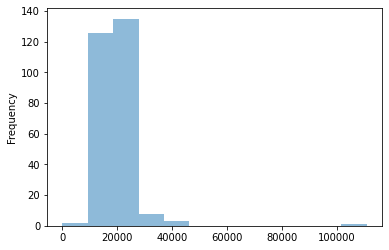

In [ ]:
ax = df_404['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

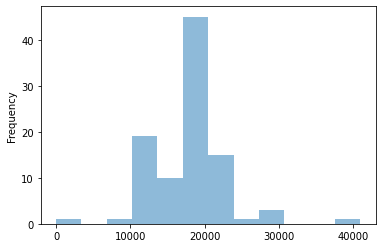

In [ ]:
ax = df_500['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

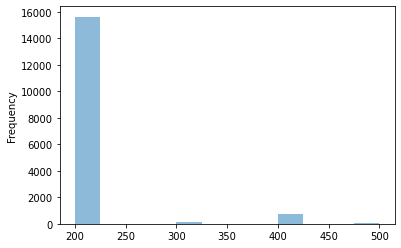

In [ ]:
ax = dfr['response_code'].plot.hist(bins=12, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


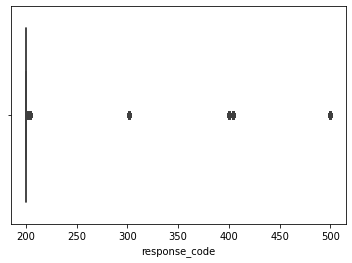

In [ ]:
sns.boxplot(dfr.response_code)

In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=random_state)

model.fit(dfr[['response_code']])

print(model.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F4C30BC76B0, 'verbose': 0, 'warm_start': False}


In [ ]:
dfr['scores'] = model.decision_function(dfr[['response_code']])

dfr['anomaly_score'] = model.predict(dfr[['response_code']])

dfr[dfr['anomaly_score']==-1].head()

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count,scores,anomaly_score
0,0,GET,/petclinic,NaN,302,15000,107,-0.394591,-1
1,1,HEAD,/petclinic,NaN,302,0,107,-0.394591,-1
2,2,POST,/petclinic,NaN,302,0,107,-0.394591,-1
3,3,PUT,/petclinic,NaN,302,11000,107,-0.394591,-1
4,4,DELETE,/petclinic,NaN,302,19000,107,-0.394591,-1


In [ ]:
dfr.drop_duplicates('response_code')

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count,scores,anomaly_score
0,0,GET,/petclinic,NaN,302,15000,107,-0.394591,-1
7,7,GET,/petclinic/actuator,NaN,200,19000,15121,0.000000,1
9,9,GET,/petclinic/actuator/health/**,"{ ""fuzz"": false }",404,13000,275,-0.308671,-1
12,12,POST,/petclinic/api/owners,"{ ""fuzz"": false }",400,17000,483,-0.254119,-1
24,24,POST,/petclinic/api/pettypes,"{ ""id"":1, ""name"":""fuzzstring""}",201,23000,376,-0.258626,-1
296,296,GET,/petclinic/error,"{ ""date"":""fuzzstring"", ""description"":""fu...",500,17000,96,-0.429448,-1
369,369,PUT,/petclinic/api/specialties/1,"{ ""id"":1, ""name"":""fuzzstring""}",204,12000,126,-0.349024,-1


In [ ]:
df_200['scores'] = model.decision_function(df_200[['response_time_microseconds']])

df_200['anomaly_score'] = model.predict(df_200[['response_time_microseconds']])

df_200[df_200['anomaly_score']==-1].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count_max,count,scores,anomaly_score
5184,5184,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,184000,241000,15121,-0.015431,-1
5518,5518,GET,/petclinic/actuator,"{ ""fuzz"": false }",200,102000,241000,15121,-0.000566,-1
5647,5647,GET,/petclinic/actuator,"{ ""id"":1, ""name"":""fuzzstring""}",200,148000,241000,15121,-0.011977,-1
7223,7223,GET,/petclinic/actuator/health,"{ ""fuzz"": false }",200,111000,241000,15121,-0.006823,-1
7837,7837,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,125000,241000,15121,-0.009110,-1


In [ ]:
ano = df_200[df_200['anomaly_score']==-1]

In [ ]:
ano.loc[ano['response_time_microseconds']>100000]

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count_max,count,scores,anomaly_score
5184,5184,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,184000,241000,15121,-0.015431,-1
5518,5518,GET,/petclinic/actuator,"{ ""fuzz"": false }",200,102000,241000,15121,-0.000566,-1
5647,5647,GET,/petclinic/actuator,"{ ""id"":1, ""name"":""fuzzstring""}",200,148000,241000,15121,-0.011977,-1
7223,7223,GET,/petclinic/actuator/health,"{ ""fuzz"": false }",200,111000,241000,15121,-0.006823,-1
7837,7837,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,125000,241000,15121,-0.009110,-1
8354,8354,GET,/petclinic/actuator,"{ ""id"":1, ""name"":""fuzzstring""}",200,168000,241000,15121,-0.015431,-1
8356,8356,GET,/petclinic/actuator,"{ ""id"":1, ""name"":""fuzzstring""}",200,103000,241000,15121,-0.001701,-1
9178,9178,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,241000,241000,15121,-0.015431,-1
11951,11951,GET,/petclinic/actuator,"{ ""date"":""fuzzstring"", ""description"":""fu...",200,109000,241000,15121,-0.004543,-1
12221,12221,GET,/petclinic/actuator,"{ ""id"":1, ""name"":""fuzzstring""}",200,106000,241000,15121,-0.003973,-1
